In [2]:
# Python uses packages to simplify data manipulation and analysis.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

### DATA DESCRIPTION :
1. Pregnancy: Women who have had multiple pregnancies have an increased risk of developing gestational diabetes, a type of diabetes that occurs during pregnancy. Gestational diabetes can increase the risk of developing type 2 diabetes later in life.


2. Glucose: Glucose levels in the blood play a crucial role in diabetes prediction. High blood glucose levels (hyperglycemia) are a hallmark of diabetes.
  
  
3. Blood Pressure: High blood pressure (hypertension) is often associated with diabetes. The two conditions frequently coexist and can exacerbate each other's negative effects on health.

4. Skin Thickness: Although skin thickness itself is not directly related to diabetes, changes in skin thickness can be a sign of certain diabetes-related complications, such as diabetic dermopathy. 

5. Insulin: Insulin is a hormone that regulates blood sugar levels by facilitating the uptake of glucose into cells. In diabetes, the body either does not produce enough insulin (type 1 diabetes) or becomes resistant to its effects (type 2 diabetes). Measuring insulin levels or assessing insulin resistance can aid in predicting and diagnosing diabetes.

6. BMI (Body Mass Index): BMI is a measure of body fat based on a person's weight and height. High BMI is associated with an increased risk of developing type 2 diabetes. 

7. Diabetes Pedigree Function (DPF): DPF is a numerical score that assesses the likelihood of developing diabetes based on family history. DPF takes into account the number of relatives with diabetes and the age at which they were diagnosed, providing valuable genetic information for diabetes prediction.

8. Age: Age is an important factor in diabetes prediction. The risk of developing type 2 diabetes increases with age, as the body's ability to regulate blood sugar levels may decline over time.

9. Outcome/Prediction: This feature represents the outcome or prediction itself, indicating whether an individual has diabetes or not. It serves as the target variable in machine learning models, enabling the assessment of the accuracy and effectiveness of the prediction algorithm.

Overall, these features play significant roles in the prediction of diabetes. By analyzing these factors, healthcare professionals can assess the risk of developing diabetes, make early diagnoses, and provide appropriate preventive measures and interventions to manage the condition effectively.

## 1. Exploratory Data Analysis
Exploratory data analysis is an important step in any research analysis. It searches for any patterns in the data. It describes the structure of the data. EDA is a part of data-preprocessing. Helps usunderstand the how ready the data is for modeling. The crucial characteristics of the data can be summarized with EDA. 
Questions we can answer:


1. What is the shape of data :- Shape of the data helps us understand the structure ie. the distribution of the data, it can porvides insights on the underlying patterns in the data. 

2. Are there redundant variables?
    - Redunancy (providing the same effect) refers to the variables that provide the same information as the other variables in the dataset. They do not provide any additional information and hence they can be dropped or removed without affecting the outcome of the prediction or analysis.

3. Are there any missing or null values?- Missing values can cause trouble with the accuracy of the model. They are to be treated. 

4. Is there any relationship between variables?
- Correlation: can be one of the meaning of realtionship here. It measure how much one varibale changes with change in the other variables. 
- Assosciation: can be one of relationship etric or factors which can help us understand the associations between variables that may not be related through a common underlying factor. 
- Causation: can help identify the potential causal relationship sbetween variables. If two variables ar ehighly correlated, it may suggest a causal relationship that need ot be looked into further. 



### A. Descriptive Statistics: 
Descriptive Statistics helps us summarize the data. It includes measures of **Central Tendency**: mean, meaian, mode. **Measure of variablitiy**: standard deviation, variance, the coeeficient of Variation, and so on. 

### B. Inferential Statistics:
Inferential statistics are procedures based on findings from a smaple that represent a popi=ulation. Inf stats. if snothing but the procedures that help us draw inferences form a sample. 
        It includes **Hypothessi testing** and **Parameter Estimation**. Helps us infer parameters of the population, based on the sample and build models on the same. 

## EDA : 

In [3]:
#import the data set 
import pandas as pd

#read the data
df = pd.read_csv("diabetes2(my_work) .csv")

#check for the first few rows 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#### 1. DATA SUMMARY

In [5]:
#Summary of all rhe variable in the dataset 
df.info()
# shape - 768,9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Interpretation: The dataset has 8 independent variables out of which all are numeric variables.

### 2. 8 - point summary :

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Inference:
- There are zero values for Glucose, BloodPressure, SkinThickness, Insulin and BMI 
- Imputation can be done by various methods

### 3. Percentage (%) of diabetic individuals in the dataset:

In [7]:
#total individuals:
len(df)

768

In [8]:
#sum of diabetic individuals 
sum(df.Outcome)

268

In [9]:
#percentage of diabetic individuals in the dataset:
print('% of diabetic individuals in the dataset:', round(sum(df.Outcome)*100/ len(df), 2))

% of diabetic individuals in the dataset: 34.9


### 4.  Zero Value Imputation : 
- Zero values can be imputed on basis of the skewness of the data 
- For skewed data, we used median, as median will be the positional average and will not be affected by skewness, while the mean can be affected by the skewness
- Mean can be used as an imputation technique for the symmetrically distributed features


### a) Glucose:

1. Percentage of zero values:

In [10]:
#checking for /5 of zero values in glucose
(len(df[df.Glucose==0])/len(df))*100 

0.6510416666666667

In [11]:
df.loc[(df.Glucose==0), ['Age']] 

,Age
75,22
182,21
342,22
349,37
502,41


In [12]:
df.Glucose.skew()
#checking for skewness of glucose, since it's slightly skewed, impute with mean 

0.17375350179188992

 2. Distribution plot for glucose 

<Axes: xlabel='Glucose', ylabel='Density'>

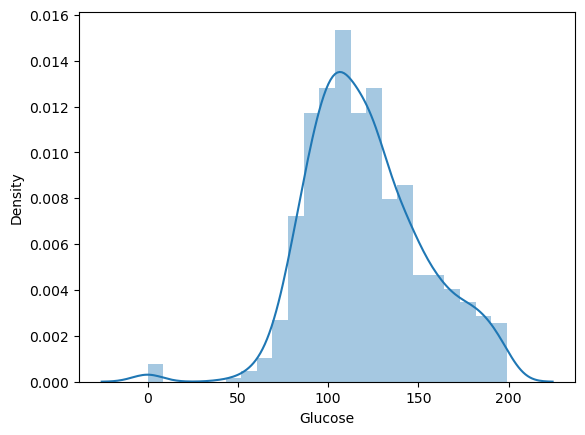

In [13]:
import seaborn as sns 
sns.distplot(df['Glucose'])
#left skewed

3. Impute with mean for Glucose

In [14]:
for i in (df.Glucose.index):
    if(df.Glucose[i]==0):
        age = df.Age[i]  
        df.Glucose[i] = df.loc[(df.Age==age)&(df.Glucose!=0)].mean()[1]

### b) Blood Pressure:

1. Check for percentage of zero values in BloodPressure

In [15]:
#percentage of zero values:
(len(df[df.BloodPressure==0])/len(df))

0.045572916666666664

2. Distribution plot for BloodPressure

<Axes: xlabel='BloodPressure', ylabel='Density'>

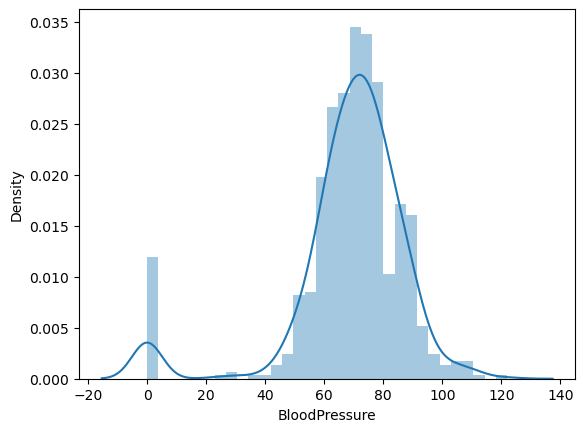

In [16]:
sns.distplot(df['BloodPressure'])

In [17]:
#skewness of bloodpressure
df.BloodPressure.skew()
#left skewed   

-1.8436079833551302

BloodPressure also has NaN and zero values :  

In [18]:
#impute zero values 
# Impute zero values based on age
for i in df.index:
    if df['BloodPressure'][i] == 0:
        age = df['Age'][i]
        median_bp = df.loc[(df['Age'] == age) & (df['BloodPressure'] != 0), 'BloodPressure'].median()
        df.at[i, 'BloodPressure'] = median_bp
        

#Impute NaN values:
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =  True)

In [19]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### c) BMI

In [20]:
(len(df[df.BMI==0])/len(df))

0.014322916666666666

<Axes: xlabel='BMI', ylabel='Density'>

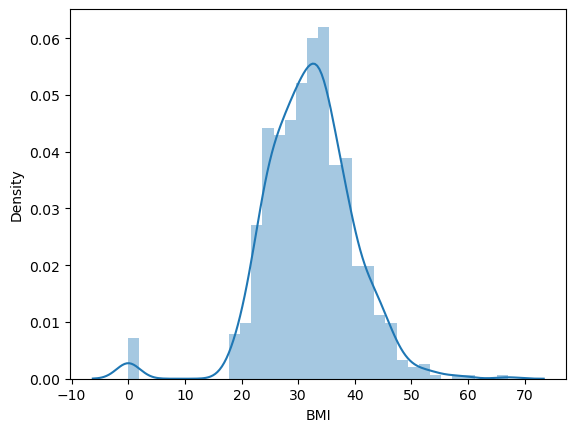

In [21]:
sns.distplot(df['BMI'])

In [22]:
df.BMI.skew()
#close to normally distributed, lets take the mean to fill in for the zero values

-0.42898158845356543

In [23]:
for i in (df.BMI.index):
    if(df.BMI[i] == 0):
        age = df.Age[i]
        df.BMI[i] = df.loc[(df.Age==age)&(df.BMI!=0)].mean()[5]

### d) SkinThickness

1. %of zero values

In [24]:
(len(df[df.SkinThickness==0])/len(df))

0.2955729166666667

2. Distribution for SkinThickness

<Axes: xlabel='SkinThickness', ylabel='Density'>

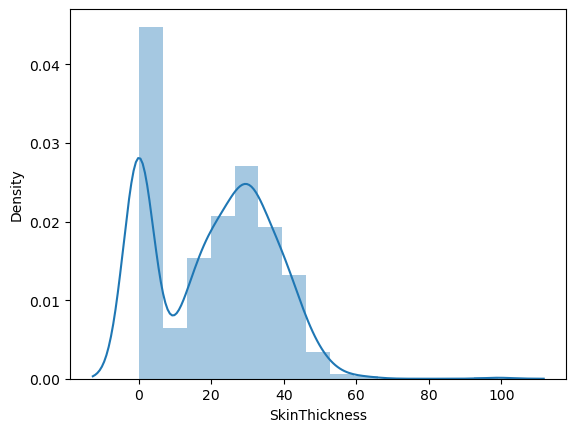

In [25]:
sns.distplot(df['SkinThickness'])

Inference : 
- This is a bi-modal distribution, i.e., there are two peaks observed, so mean or median cannot be used for imputation  
- So the various methods for imputation would be:
       - Mixture models 
       - Non-parametric methods (k-nearest neighbors) 
       - Two-step imputation 
       
- We can use knn for the imputation 

In [26]:
#replace 0 with NaN
import numpy as np
df['SkinThickness']=df['SkinThickness'].replace(to_replace=0,value = np.nan)

In [27]:
df['SkinThickness'].isna().any()

True

In [28]:
df.shape

(768, 9)

In [29]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

#fit the model
df['SkinThickness'] = imputer.fit_transform(df[['SkinThickness']])

In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682671,72.325521,29.153420,79.799479,32.442511,0.471876,33.240885,0.348958
std,3.369578,30.452673,12.138307,8.790942,115.244002,6.885271,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,30.500000,32.250000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='SkinThickness', ylabel='Density'>

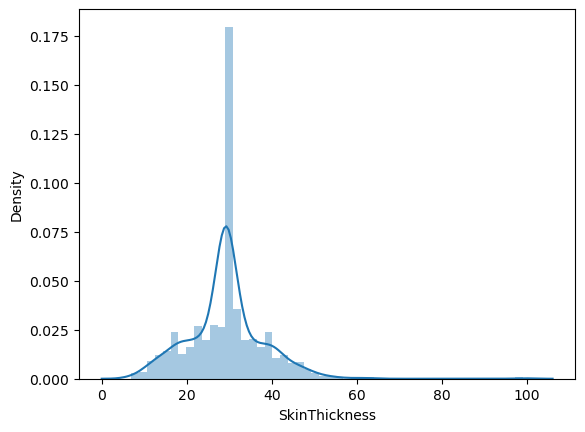

In [31]:
sns.distplot(df['SkinThickness'])

- The bi-model distribution has been changed to a uni-modal after the zero value imputation 

### e) Insulin

1. Check for correlation for imputation: 

We are using Linear Regression Imputation here as there is a high % of zero values 

In [32]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129614,0.217039,0.082989,-0.073535,0.024500,-0.033523,0.544341,0.221898
Glucose,0.129614,1.000000,0.224224,0.194570,0.330892,0.234481,0.137992,0.268353,0.495381
BloodPressure,0.217039,0.224224,1.000000,0.192785,-0.042116,0.285274,0.002044,0.332324,0.168172
SkinThickness,0.082989,0.194570,0.192785,1.000000,0.112974,0.542462,0.100966,0.127872,0.215299
Insulin,-0.073535,0.330892,-0.042116,0.112974,1.000000,0.185527,0.185071,-0.042163,0.130548
BMI,0.024500,0.234481,0.285274,0.542462,0.185527,1.000000,0.150042,0.025900,0.314478
DiabetesPedigreeFunction,-0.033523,0.137992,0.002044,0.100966,0.185071,0.150042,1.000000,0.033561,0.173844
Age,0.544341,0.268353,0.332324,0.127872,-0.042163,0.025900,0.033561,1.000000,0.238356
Outcome,0.221898,0.495381,0.168172,0.215299,0.130548,0.314478,0.173844,0.238356,1.000000


In [33]:
(len(df[df.Insulin==0])/len(df)) 
#checking for % of zero values, 4% of zero values

0.4869791666666667

3. Distribution for Insulin :

<Axes: xlabel='Insulin', ylabel='Density'>

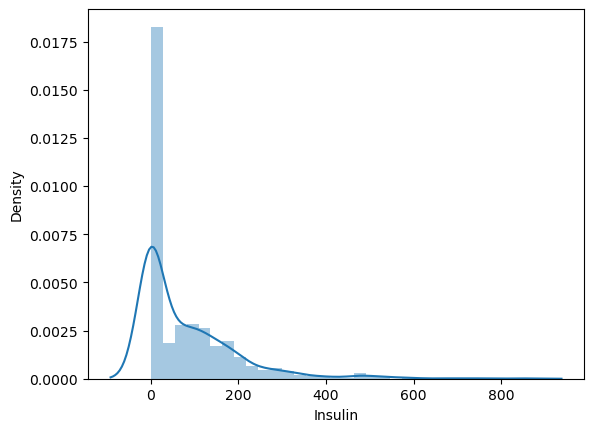

In [34]:
sns.distplot(df['Insulin'])

In [35]:
df.Insulin.skew()
#highly right skewed 

2.272250858431574

In [36]:
from sklearn.linear_model import LinearRegression 

known = df[df['Insulin'] != 0]  #known are values that are non-zero
unknown = df[df['Insulin'] == 0] #unknown are the zero values

model= LinearRegression()   #fit the model
model.fit(known[['DiabetesPedigreeFunction', 'BMI']], known['Insulin'])

#predict for the unknown 
unknown['Insulin'] = model.predict(unknown[['DiabetesPedigreeFunction','BMI']]) 

#concatenate the into a dataframe 
df_imputed = pd.concat([known,unknown], axis=0)

df_imputed.describe()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682671,72.325521,29.153420,151.524126,32.442511,0.471876,33.240885,0.348958
std,3.369578,30.452673,12.138307,8.790942,87.215429,6.885271,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,109.916984,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,140.000000,32.250000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,170.472372,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
#3checking if all the zero values are imputeddf = df_imputed
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682671,72.325521,29.153420,79.799479,32.442511,0.471876,33.240885,0.348958
std,3.369578,30.452673,12.138307,8.790942,115.244002,6.885271,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,30.500000,32.250000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.isna().any()
#checking if the imputation caused any NaN values to be created

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### 5. Univariate Analysis 

In [39]:
#splitting target and variables
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target = ['Outcome'] 

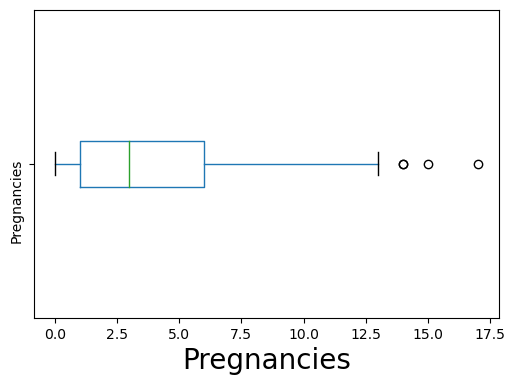

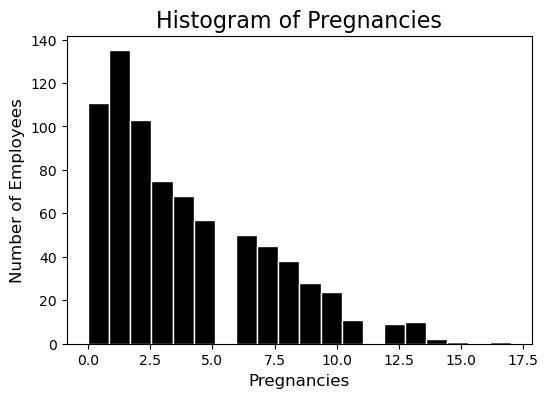

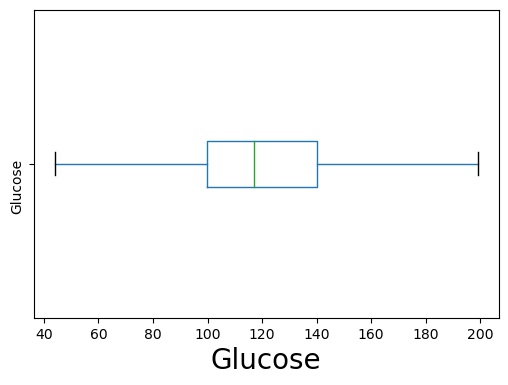

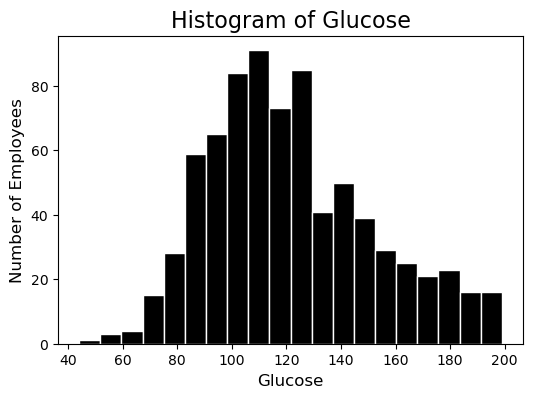

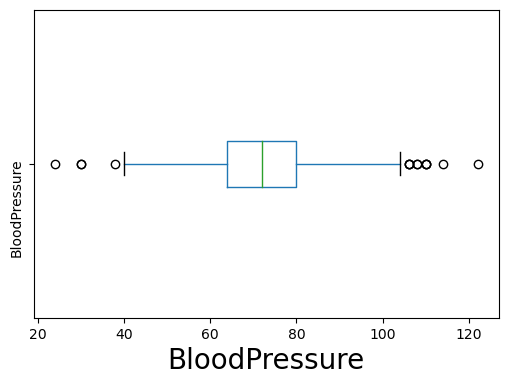

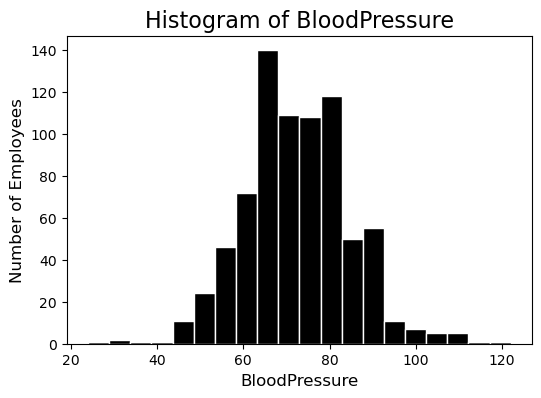

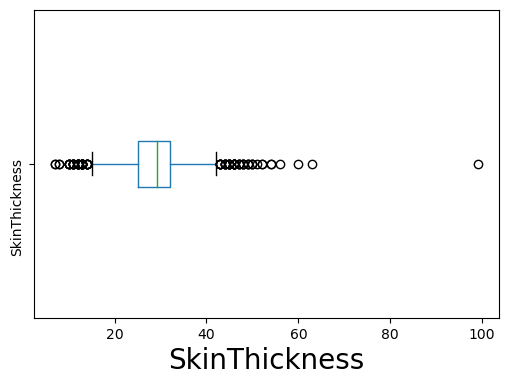

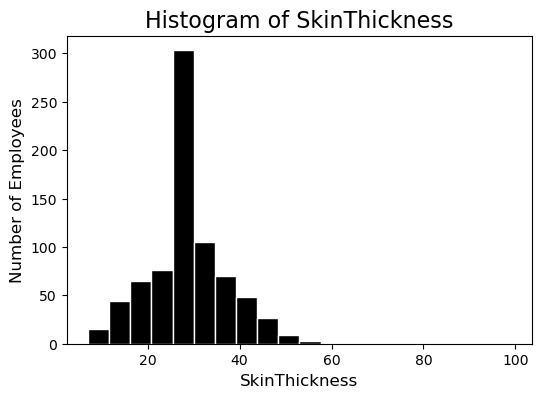

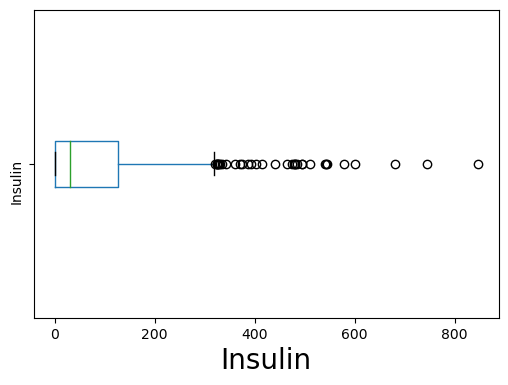

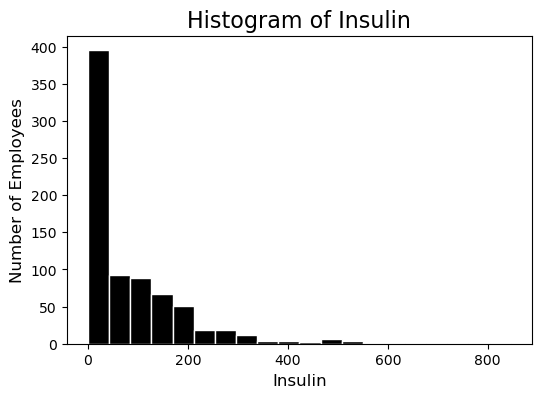

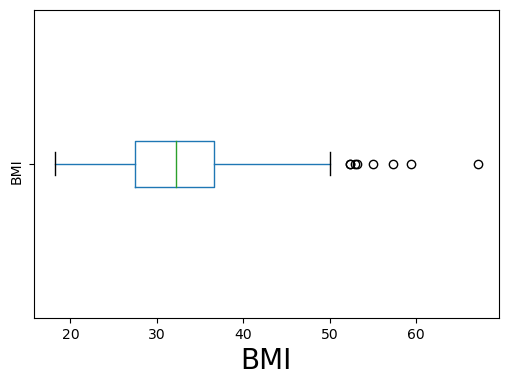

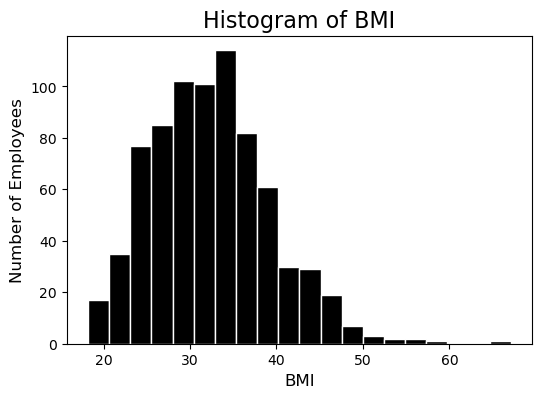

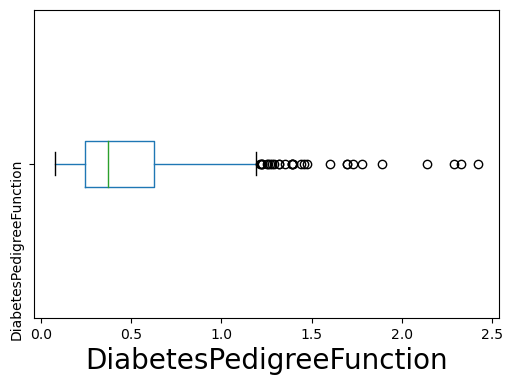

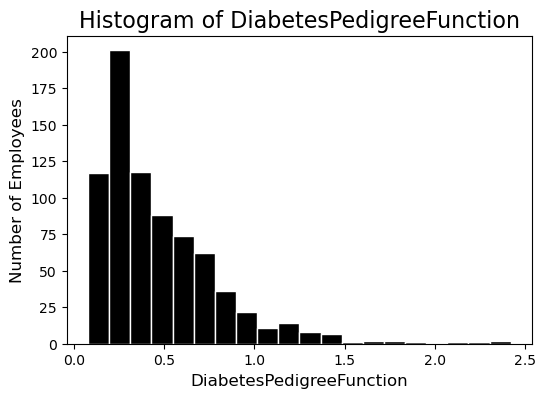

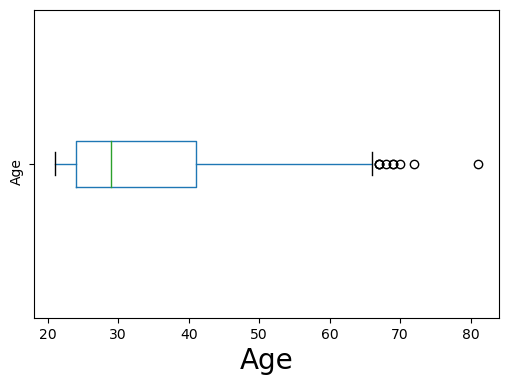

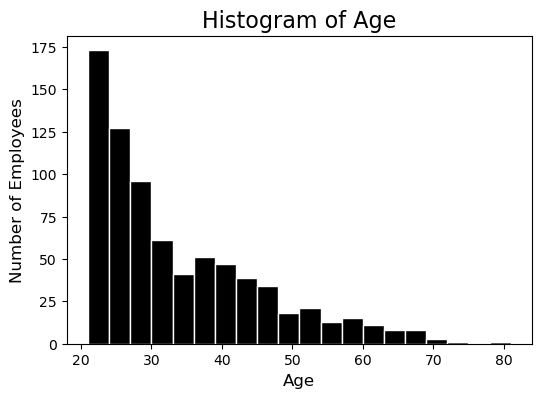

In [40]:
for i in range(len(features)):
    df.boxplot(features[i],figsize=(6,4),grid=False,vert=False)
    plt.xlabel(features[i], fontsize=20)
    plt.yticks(rotation=90)


    df.hist(column=features[i],grid=False,figsize=(6,4),color="black",edgecolor="white",bins=20)  #To exculde grids and to change the size of the plot in inches

    plt.xlabel(features[i], fontsize=12)
    plt.ylabel("Number of Employees", fontsize=12)
    str_="Histogram of "+ features[i]
    plt.title(str_, fontsize=16)

    plt.show()

### 6. Bivariate Analysis

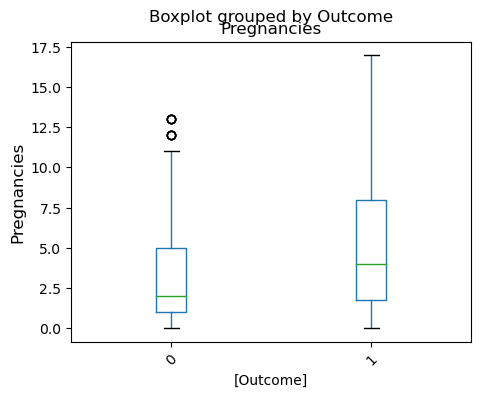

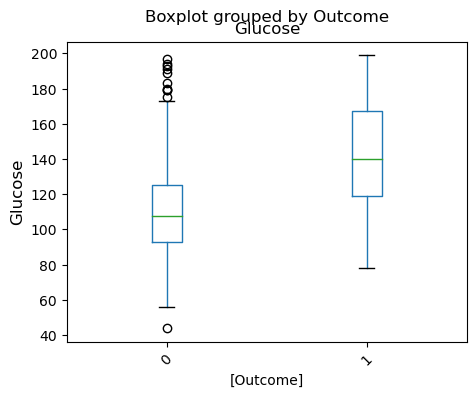

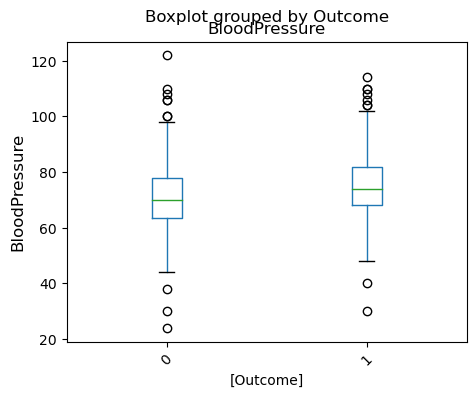

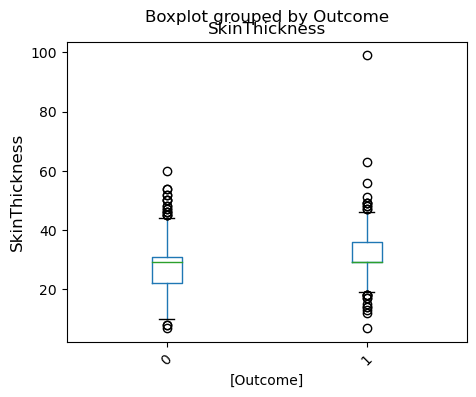

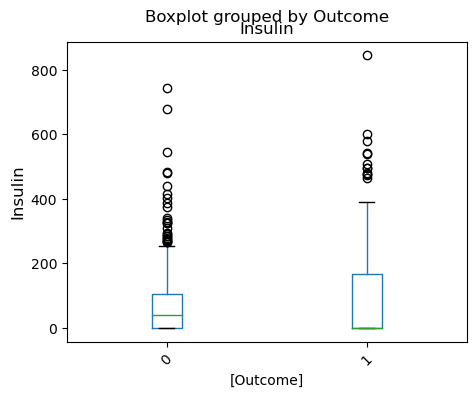

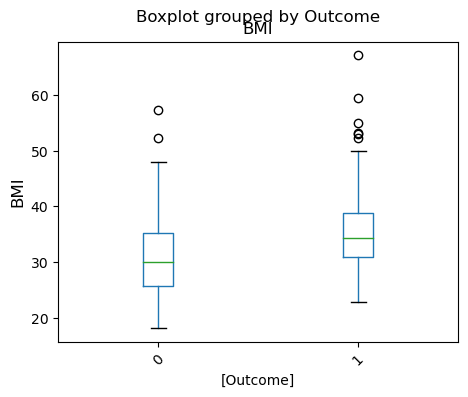

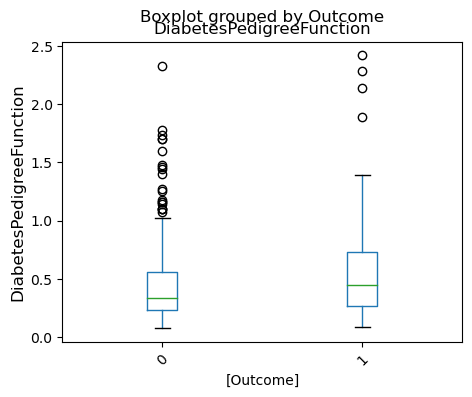

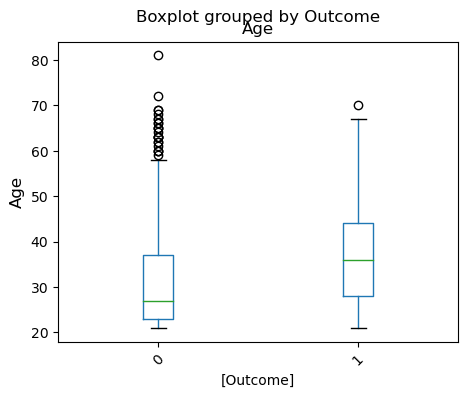

In [41]:
for i in range(len(features)):
    df.boxplot(column=features[i],by=target, grid=False, figsize=(5,4),notch=False,rot = 45)
    plt.ylabel(features[i], fontsize=12)
    plt.show()

- This essentially helps us in understand how the outcome/target variable is for each predictor variable.

### Flow:
- Implement various models to obtain the best fitting model
- Models used: Logistic Regression, KNN Classification and Decision Tree Regressor

### Implementation - 1 
## LOGISTIC REGRESSION

In [42]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)
# definine X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)
# Splitting the data so 20% is for testing

model = LogisticRegression()
# instantiate the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

model_score = model.score(X_test, y_test)

print(f"R-square : {model_score}")

R-square : 0.7135416666666666


- **CONFUSION MATRIX**

In [43]:
cm=confusion_matrix(y_predict,y_test)
print(cm)

[[106  37]
 [ 18  31]]


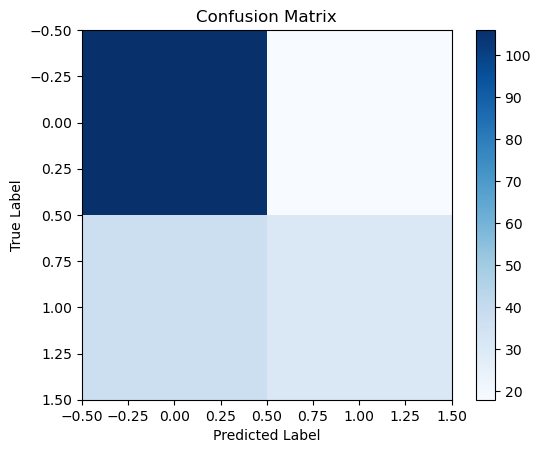

In [44]:
# Assuming you have already trained and obtained predictions from your model
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **Model Evaluation: Performance Metrics and Comparison**

In [45]:
# Calculate the performance metrics for train
train_precision = precision_score(y_train, y_predict_train)
train_recall = recall_score(y_train, y_predict_train)
train_accuracy = accuracy_score(y_train, y_predict_train)
train_f1_score = f1_score(y_train, y_predict_train)
train_auc_score = roc_auc_score(y_train, y_predict_train)

# Calculate the performance metrics for test 
test_precision = precision_score(y_test, y_predict)
test_recall = recall_score(y_test, y_predict)
test_accuracy = accuracy_score(y_test, y_predict)
test_f1_score = f1_score(y_test, y_predict)
test_auc_score = roc_auc_score(y_test, y_predict)

# Create a dictionary with the performance metrics
data = {
    'Metric': ['Precision', 'Recall', 'Accuracy', 'F1 Score', 'AUC Score'],
    'Train': [train_precision, train_recall, train_accuracy, train_f1_score, train_auc_score],
    'Test': [test_precision, test_recall, test_accuracy, test_f1_score, test_auc_score]
}

# Create a DataFrame from the dictionary
performance = pd.DataFrame(data)

# Set the 'Metric' column as the index
performance.set_index('Metric', inplace=True)

# Display the DataFrame
print(performance)


              Train      Test
Metric                       
Precision  0.680982  0.632653
Recall     0.555000  0.455882
Accuracy   0.755208  0.713542
F1 Score   0.611570  0.529915
AUC Score  0.708351  0.655361


###  ROC CURVE

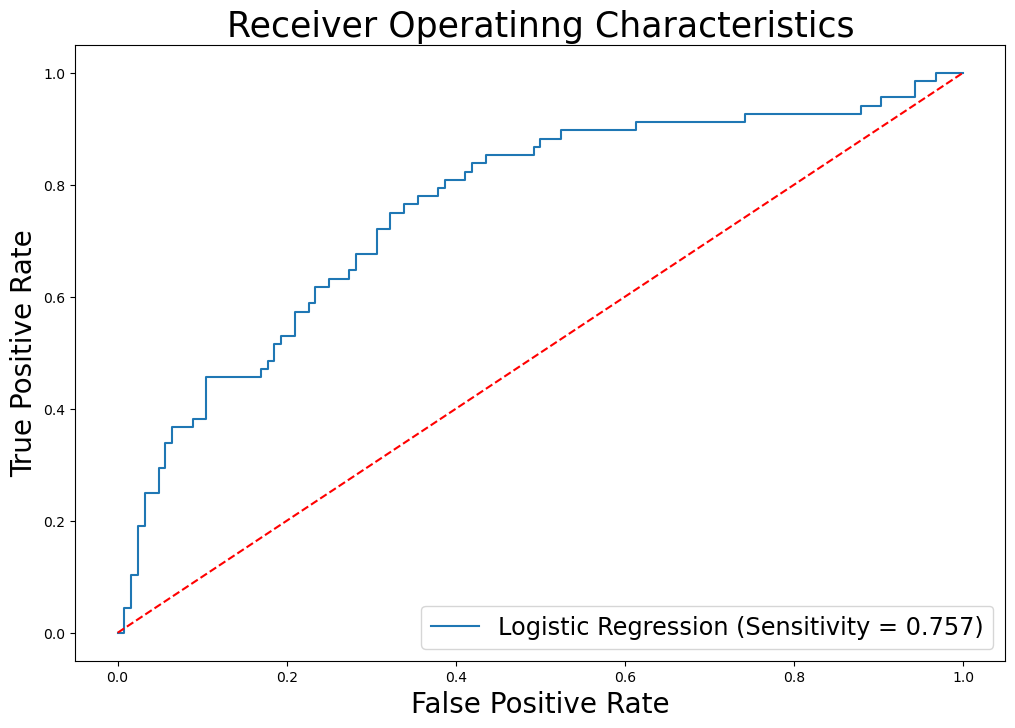

In [46]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.757

- ### AUC score for LR model is 0.757

### CLASS WISE PERFORMANCE

In [47]:
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       124
           1       0.63      0.46      0.53        68

    accuracy                           0.71       192
   macro avg       0.69      0.66      0.66       192
weighted avg       0.70      0.71      0.70       192



### Inference:
- For class 0, the prediction is much better as there is more data available 
- Class 1's prediction is not as good as for the class 0 
- However, there isn't a significant class imbalance in the dataset, there is 35% of class 1 in the dataset

### Implementation - 2  
## KNN Classifier
   - Choose optimal K value KNN

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [49]:
#split into train and test 
from sklearn.model_selection import train_test_split
X= df.drop(columns='Outcome')
y=df.Outcome          
scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(X) 
x = pd.DataFrame(x_scaled,columns = X.columns)

In [50]:
#split for knn and LR with scaled data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,stratify=y)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    
    
    print("----------------For Neighbors = ",i,'---------------')
    
    print("----------------TRAIN---------------")
    print("\n Confusion Matrix is :\n", confusion_matrix(y_train,y_pred_train))
    print("\nPrecision Score is for train:\n",precision_score(y_train,y_pred_train))
    print("\nRecall Score is for train :\n",recall_score(y_train,y_pred_train))
    print("\nAccuracy Score is for train:\n",accuracy_score(y_train,y_pred_train))
    print("\nF1 Score is for train:\n",f1_score(y_train,y_pred_train))
    
    print("----------------TEST---------------")
    print("\n Confusion Matrix is for test :\n", confusion_matrix(y_test,y_pred_test)) 
    print("\nPrecision Score is for test:\n",precision_score(y_test,y_pred_test))
    print("\nRecall Score is for test:\n",recall_score(y_test,y_pred_test))
    print("\nAccuracy Score is for test:\n",accuracy_score(y_test,y_pred_test))
    print("\nF1 Score is for test:\n",f1_score(y_test,y_pred_test))

----------------For Neighbors =  1 ---------------
----------------TRAIN---------------

 Confusion Matrix is :
 [[400   0]
 [  0 214]]

Precision Score is for train:
 1.0

Recall Score is for train :
 1.0

Accuracy Score is for train:
 1.0

F1 Score is for train:
 1.0
----------------TEST---------------

 Confusion Matrix is for test :
 [[82 18]
 [25 29]]

Precision Score is for test:
 0.6170212765957447

Recall Score is for test:
 0.5370370370370371

Accuracy Score is for test:
 0.7207792207792207

F1 Score is for test:
 0.5742574257425743
----------------For Neighbors =  2 ---------------
----------------TRAIN---------------

 Confusion Matrix is :
 [[400   0]
 [ 98 116]]

Precision Score is for train:
 1.0

Recall Score is for train :
 0.5420560747663551

Accuracy Score is for train:
 0.8403908794788274

F1 Score is for train:
 0.703030303030303
----------------TEST---------------

 Confusion Matrix is for test :
 [[89 11]
 [33 21]]

Precision Score is for test:
 0.65625

Recall Sc

### Interpretation:
##### For model K = 7 


--------------TRAIN---------------

Accuracy Score is for train:
 0.8078175895765473

F1 Score is for train:
 0.716346153846154
 
 
----------------TEST---------------

Accuracy Score is for test:
 0.7792207792207793

F1 Score is for test:
 0.6792452830188679

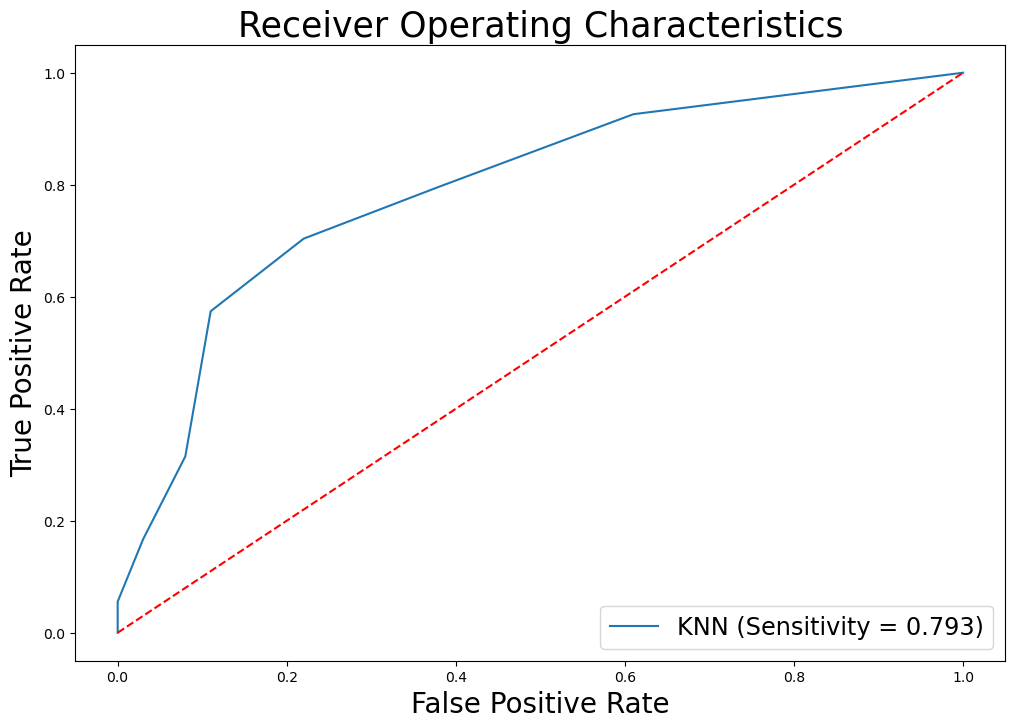

In [53]:
# Fit the KNN model with k=7
k = 7
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label="KNN (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4, fontsize='xx-large')
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title("Receiver Operating Characteristics", size=25)
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### Using Sequential Forward Selection With KNN 


pip install mlxtend

In [165]:
# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Create the Sequential Feature Selector object
sfs = SequentialFeatureSelector(knn, k_features=5, forward=True, floating=False, scoring='accuracy', cv=5)

# Perform the feature selection
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_indices = sfs.k_feature_idx_

# Get the selected feature names
selected_features = [X.columns[idx] for idx in selected_indices]

# Print the selected feature indices and feature names
print("Selected feature indices:", selected_indices)
print("Selected features:", selected_features)

# Select the features for train and test sets
X_train_selected = X_train.iloc[:, list(selected_indices)]
X_test_selected = X_test.iloc[:, list(selected_indices)]

# Fit the k-NN classifier with selected features
knn.fit(X_train_selected, y_train)

# Predict on train and test sets
y_pred_train = knn.predict(X_train_selected)
y_pred_test = knn.predict(X_test_selected)

# Calculate performance metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_confusion = confusion_matrix(y_train, y_pred_train)
test_confusion = confusion_matrix(y_test, y_pred_test)

train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)

train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)

train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)

# Create a DataFrame to display the results
performance_table = pd.DataFrame({
    'Performance Metric': ['Accuracy', 'Confusion Matrix', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [train_accuracy, train_confusion, train_precision, train_recall, train_f1],
    'Test Set': [test_accuracy, test_confusion, test_precision, test_recall, test_f1]
})

# Display the performance table
print(performance_table)

Selected feature indices: (0, 1, 5, 6, 7)
Selected features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
  Performance Metric               Train Set              Test Set
0           Accuracy                0.837134              0.746753
1   Confusion Matrix  [[360, 41], [59, 154]]  [[80, 19], [20, 35]]
2          Precision                0.789744              0.648148
3             Recall                0.723005              0.636364
4           F1 Score                0.754902              0.642202


### Inference:
- Using SFS with KNN classifier does not improve the model very significantly
- The features selected by SFS are: 'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'
- The k-value selected is 5 

###  ROC CURVE

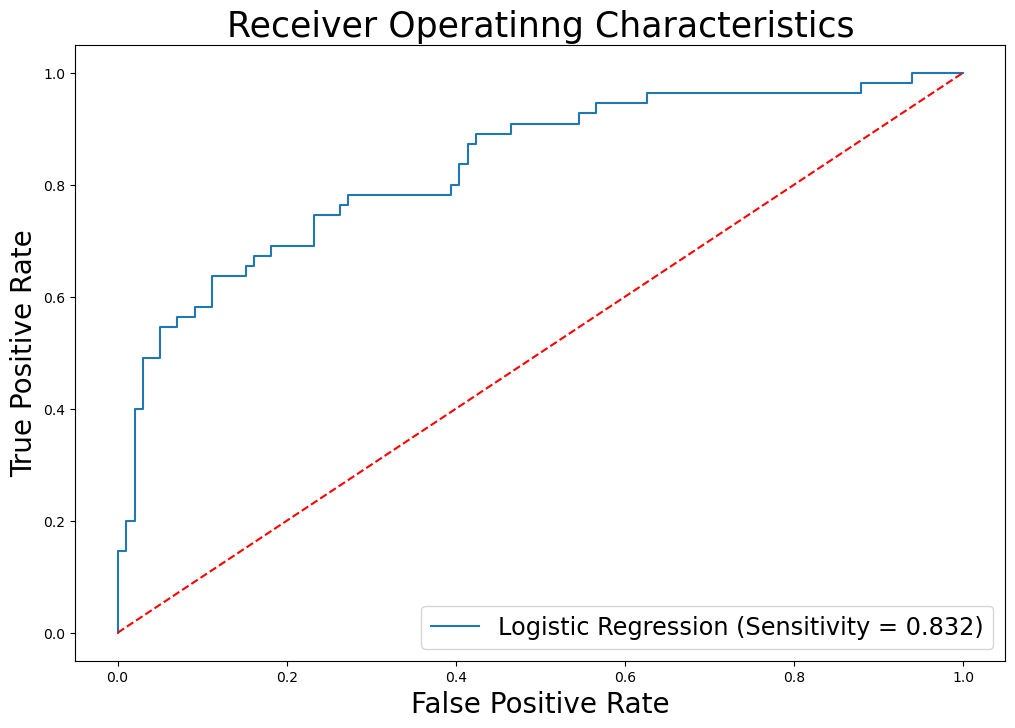

In [166]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()


- ### AUC score for SFS-KNN model is 0.832

### Implementation -3 
## DECISION TREE
- Find the optimal tree depth 

##### Various hyper-parameter tuning options in Decsion Tree:
- 'max_depth' : maximum depth the tree can have / max splits the tree can have
- 'min_samples_split': minimum no. of sample required in an internal node to split further
- 'min_samples_leaf': the minimum no. of samples that a leaf node should contain 
- 'max_features': maximum no. of features to consider for splits 

In [169]:
def best_depth_for_dt(X_train, X_test, y_train, y_test, max_no_of_neighbors):
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    depth_values = []
    auc_score = []
    for i in range(1, max_no_of_neighbors):
        dtree = DecisionTreeClassifier(max_depth=i, criterion='gini')
        dtree.fit(X_train, y_train)
        y_pred = dtree.predict(X_test)

        depth_values.append(i)
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        auc_score.append(roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1]))

        print("------------------For Depth =", i, "------------------------")
        print("\nConfusion Matrix is:\n", confusion_matrix(y_test, y_pred))
        print("\nPrecision Score is:\n", precision_score(y_test, y_pred))
        print("\nRecall Score is:\n", recall_score(y_test, y_pred))
        print("\nAccuracy Score is:\n", accuracy_score(y_test, y_pred))
        print("\nF1 Score is:\n", f1_score(y_test, y_pred))
        print("\nAUC score is:\n", roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1]))

    # Plotting precision, recall, accuracy, and AUC score
    plt.plot(depth_values, precision_scores, label='Precision')
    plt.plot(depth_values, recall_scores, label='Recall')
    plt.plot(depth_values, accuracy_scores, label='Accuracy')
    plt.plot(depth_values, auc_score, label='AUC SCORE')

    plt.xlabel('Depth')
    plt.ylabel('Score')
    plt.title('Performance Metrics vs. Depth')
    plt.legend()
    plt.show()

------------------For Depth = 1 ------------------------

Confusion Matrix is:
 [[77 22]
 [18 37]]

Precision Score is:
 0.6271186440677966

Recall Score is:
 0.6727272727272727

Accuracy Score is:
 0.7402597402597403

F1 Score is:
 0.6491228070175439

AUC score is:
 0.7252525252525254
------------------For Depth = 2 ------------------------

Confusion Matrix is:
 [[87 12]
 [23 32]]

Precision Score is:
 0.7272727272727273

Recall Score is:
 0.5818181818181818

Accuracy Score is:
 0.7727272727272727

F1 Score is:
 0.6464646464646464

AUC score is:
 0.7711662075298439
------------------For Depth = 3 ------------------------

Confusion Matrix is:
 [[83 16]
 [21 34]]

Precision Score is:
 0.68

Recall Score is:
 0.6181818181818182

Accuracy Score is:
 0.7597402597402597

F1 Score is:
 0.6476190476190475

AUC score is:
 0.8020202020202021
------------------For Depth = 4 ------------------------

Confusion Matrix is:
 [[70 29]
 [17 38]]

Precision Score is:
 0.5671641791044776

Recall Score

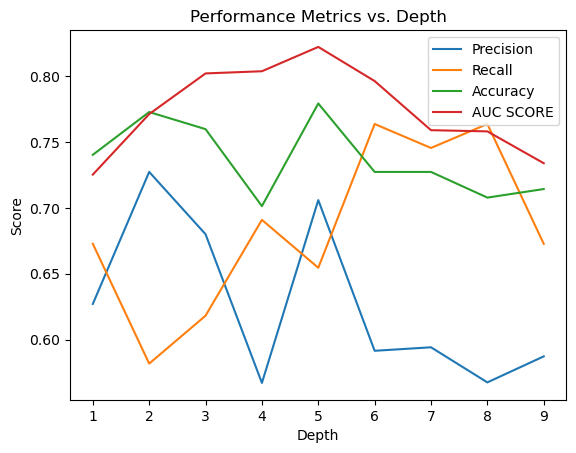

In [170]:
best_depth_for_dt(X_train, X_test, y_train, y_test,10)


- Best depth = 5 
- So fitting a Decision Tree for just tree depth = 5 and evaluating the model respectively:


In [172]:
# Create the Decision Tree classifier with max depth 5
dtree = DecisionTreeClassifier(max_depth=5, criterion='gini')

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred = dtree.predict(X_test)

In [173]:

# Calculate performance metrics for train set
y_pred_train = dtree.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train)
auc_train = roc_auc_score(y_train, dtree.predict_proba(X_train)[:, 1])

# Calculate performance metrics for test set
y_pred_test = dtree.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1])

# Create a table to display the performance metrics
data = {
    'Metric': ['Confusion Matrix', 'Precision', 'Recall', 'Accuracy', 'F1 Score', 'AUC'],
    'Train': [cm_train, precision_train, recall_train, accuracy_train, f1_score_train, auc_train],
    'Test': [cm_test, precision_test, recall_test, accuracy_test, f1_score_test, auc_test]
}

df = pd.DataFrame(data)
print(df)

             Metric                   Train                  Test
0  Confusion Matrix  [[362, 39], [58, 155]]  [[84, 15], [19, 36]]
1         Precision                0.798969              0.705882
2            Recall                  0.7277              0.654545
3          Accuracy                 0.84202              0.779221
4          F1 Score                0.761671              0.679245
5               AUC                0.921645               0.82213


# Comparison of the three models:
#### 1. Logistic Regression:
- The performance of LR was the least satisfying in comparison to knn and dt
- AUC for LR = 0.75

#### 2. a) KNN:
- KNN was iteratively run over a range of k values from 1-10, k=7 was the best prforming among all other k- values
- AUc for KNN ith k = 7 is 0.793
#### 2. b) SFS with KNN: 
- Features selected by sfs are: 'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'
- AUC for KNN with SFS is: 0.832

#### 3. Decision Tree:
- Decision tree with depth = 5, seems to be better performing than all the above algorithms, in terms of both accuracy, recall and precision and auc
- AUC score for dt(k=5) is: 0.92 for tain, 0.822 for test 